# Customer Churn Prediction
### We can understand this is a classification problem and we must group the customers into different catagories of churn risk(1 to 5)

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer

## Fetching Data

In [295]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe430049004400390031003300,Wan Garraway,60,M,GBH67OC,Village,Platinum Membership,2015-10-06,Yes,CID27405,...,571.450000,7778.92,5.0,704.93,Yes,Yes,No,Not Applicable,Poor Website,-1
1,fffe43004900440031003500360039003900,Carmelo Keitt,48,F,PN9XX93,Village,Silver Membership,2015-12-25,No,xxxxxxxx,...,259.620000,12549.93,36.204800566565154,765.97,Yes,No,No,Not Applicable,Poor Product Quality,3
2,fffe43004900440033003200360037003200,Albertha Fragale,28,M,NI00GZV,Town,No Membership,2015-04-19,?,CID25795,...,160.240000,25494.34,14.0,663.76,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440035003900320030003000,Sidney Hakes,44,F,EFOP88Q,Town,Basic Membership,2017-04-13,Yes,CID61848,...,1025.913200,4578.77,Error,663.69,No,Yes,No,Not Applicable,Poor Customer Service,4
4,fffe43004900440031003600340032003900,Zoe Rickman,12,M,7E58K5C,City,Basic Membership,2017-07-04,Yes,CID63467,...,1079.755553,1436.20,Error,617.71,Yes,No,No,Not Applicable,Poor Customer Service,5


In [296]:
test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440033003200320035003600,Tobias Liebold,24,F,I4AYTC2,City,Premium Membership,2015-04-22,No,xxxxxxxx,...,17,101.50,32593.20,15.0,801.18,Yes,No,No,Not Applicable,Products always in Stock
1,fffe43004900440032003200350035003400,Patrick Kizer,53,F,WV0LB6W,Town,Silver Membership,2016-01-19,No,xxxxxxxx,...,12,324.61,39155.49,21.0,NaN,No,Yes,No,Not Applicable,No reason specified
2,fffe43004900440031003000380038003300,Annamaria Freese,53,F,94O1F22,Town,No Membership,2016-02-07,Yes,CID19334,...,20,47.71,35434.17,12.0,675.17,Yes,No,No,Not Applicable,Poor Product Quality
3,fffe43004900440034003200300031003800,Gilda Lundy,61,M,74WFG9K,NaN,Gold Membership,2017-10-24,No,xxxxxxxx,...,19,451.66,30621.93,7.0,755.93,Yes,Yes,Yes,Solved,Poor Product Quality
4,fffe43004900440034003100380030003300,Angla Alameda,46,F,249HVEX,Town,Premium Membership,2016-06-11,No,xxxxxxxx,...,12,266.68,50462.15,Error,806.67,Yes,Yes,Yes,Solved,Products always in Stock


## Preprocessing

In [297]:
train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [298]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29593 entries, 0 to 29592
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   29593 non-null  object 
 1   Name                          29593 non-null  object 
 2   age                           29593 non-null  int64  
 3   gender                        29593 non-null  object 
 4   security_no                   29593 non-null  object 
 5   region_category               25227 non-null  object 
 6   membership_category           29593 non-null  object 
 7   joining_date                  29593 non-null  object 
 8   joined_through_referral       29593 non-null  object 
 9   referral_id                   29593 non-null  object 
 10  preferred_offer_types         29365 non-null  object 
 11  medium_of_operation           29593 non-null  object 
 12  internet_option               29593 non-null  object 
 13  l

In [299]:
train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,29593.000000,29593.000000,29593.000000,29593.000000,26879.000000,29593.000000
mean,37.069611,-42.039604,243.931773,29345.208786,687.410044,3.460312
std,15.899136,229.080617,399.512766,19483.727165,195.291908,1.409662
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.370000,14159.340000,616.485000,3.000000
50%,37.000000,12.000000,161.600000,27644.160000,698.000000,4.000000
75%,51.000000,16.000000,357.790000,41013.490000,764.475000,5.000000
max,64.000000,26.000000,3040.410000,99914.050000,2069.069761,5.000000


## Assumptions
### By business knowledge we can say the columns Customer_id,Name,security_no,referral_id,joining_date do not have any impact on churn

In [300]:
train.drop(["customer_id","Name","security_no","referral_id","joining_date","last_visit_time"],axis="columns",inplace=True)

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29593 entries, 0 to 29592
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           29593 non-null  int64  
 1   gender                        29593 non-null  object 
 2   region_category               25227 non-null  object 
 3   membership_category           29593 non-null  object 
 4   joined_through_referral       29593 non-null  object 
 5   preferred_offer_types         29365 non-null  object 
 6   medium_of_operation           29593 non-null  object 
 7   internet_option               29593 non-null  object 
 8   days_since_last_login         29593 non-null  int64  
 9   avg_time_spent                29593 non-null  float64
 10  avg_transaction_value         29593 non-null  float64
 11  avg_frequency_login_days      29593 non-null  object 
 12  points_in_wallet              26879 non-null  float64
 13  u

In [302]:
train.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,60,M,Village,Platinum Membership,Yes,Gift Vouchers/Coupons,?,Fiber_Optic,6,571.450000,7778.92,5.0,704.93,Yes,Yes,No,Not Applicable,Poor Website,-1
1,48,F,Village,Silver Membership,No,Without Offers,Smartphone,Mobile_Data,3,259.620000,12549.93,36.204800566565154,765.97,Yes,No,No,Not Applicable,Poor Product Quality,3
2,28,M,Town,No Membership,?,Credit/Debit Card Offers,Smartphone,Wi-Fi,16,160.240000,25494.34,14.0,663.76,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,44,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,?,Mobile_Data,14,1025.913200,4578.77,Error,663.69,No,Yes,No,Not Applicable,Poor Customer Service,4
4,12,M,City,Basic Membership,Yes,Without Offers,Smartphone,Mobile_Data,11,1079.755553,1436.20,Error,617.71,Yes,No,No,Not Applicable,Poor Customer Service,5


In [303]:
for i in train.columns:
    if train[i].dtype == object:
        print(train[i].value_counts())
        print('\n')

gender
M          14785
F          14761
Unknown       47
Name: count, dtype: int64


region_category
Town       11329
City       10185
Village     3713
Name: count, dtype: int64


membership_category
Basic Membership       6175
No Membership          6105
Gold Membership        5467
Silver Membership      4756
Premium Membership     3594
Platinum Membership    3496
Name: count, dtype: int64


joined_through_referral
No     12686
Yes    12568
?       4339
Name: count, dtype: int64


preferred_offer_types
Gift Vouchers/Coupons       9879
Credit/Debit Card Offers    9851
Without Offers              9635
Name: count, dtype: int64


medium_of_operation
Smartphone    11136
Desktop       11110
?              4291
Both           3056
Name: count, dtype: int64


internet_option
Wi-Fi          9909
Mobile_Data    9859
Fiber_Optic    9825
Name: count, dtype: int64


avg_frequency_login_days
Error                 2792
19.0                  1112
13.0                  1100
14.0                  109

In [304]:
train1=train[train["joined_through_referral"].isin(["Yes","No"])]
train1.shape


(25254, 19)

In [305]:
train2=train1[train1["gender"].isin(["M","F"])]
train2.shape

(25214, 19)

In [306]:
train3=train2[train2["medium_of_operation"] != '?']
train3.shape

(21552, 19)

In [307]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21552 entries, 1 to 29592
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           21552 non-null  int64  
 1   gender                        21552 non-null  object 
 2   region_category               18430 non-null  object 
 3   membership_category           21552 non-null  object 
 4   joined_through_referral       21552 non-null  object 
 5   preferred_offer_types         21383 non-null  object 
 6   medium_of_operation           21552 non-null  object 
 7   internet_option               21552 non-null  object 
 8   days_since_last_login         21552 non-null  int64  
 9   avg_time_spent                21552 non-null  float64
 10  avg_transaction_value         21552 non-null  float64
 11  avg_frequency_login_days      21552 non-null  object 
 12  points_in_wallet              19566 non-null  float64
 13  used_s

In [308]:
train3.head(10)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1,48,F,Village,Silver Membership,No,Without Offers,Smartphone,Mobile_Data,3,259.620000,12549.93,36.204800566565154,765.970000,Yes,No,No,Not Applicable,Poor Product Quality,3
4,12,M,City,Basic Membership,Yes,Without Offers,Smartphone,Mobile_Data,11,1079.755553,1436.20,Error,617.710000,Yes,No,No,Not Applicable,Poor Customer Service,5
5,38,M,NaN,No Membership,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,3,47.160000,19773.32,Error,126.690772,Yes,No,No,Not Applicable,No reason specified,5
6,59,F,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,23,32.160000,16625.03,7.0,756.220000,Yes,No,Yes,No Information Available,Reasonable Price,1
7,16,M,City,Silver Membership,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,12,122.780000,3516.71,17.0,726.650000,Yes,No,No,Not Applicable,Poor Customer Service,3
8,58,M,NaN,No Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,206.440000,4191.00,Error,716.350000,Yes,No,No,Not Applicable,Poor Website,4
9,47,F,City,Silver Membership,Yes,Gift Vouchers/Coupons,Both,Mobile_Data,21,1072.920000,30336.53,17.0,762.160000,Yes,Yes,Yes,Solved in Follow-up,Poor Website,3
11,38,M,Town,No Membership,Yes,Without Offers,Both,Mobile_Data,11,400.010000,16758.33,23.0,656.670000,No,Yes,Yes,No Information Available,Poor Product Quality,4
13,44,F,Village,No Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,-999,111.260000,26821.38,16.0,698.780000,No,Yes,No,Not Applicable,Poor Product Quality,4
14,52,M,Village,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,2,296.240000,39146.44,14.0,706.950000,Yes,No,No,Not Applicable,Poor Customer Service,3


In [309]:
train3['avg_frequency_login_days'][train['avg_frequency_login_days']=='Error'].count()

np.int64(2013)

In [310]:
train3["avg_frequency_login_days"]=train3["avg_frequency_login_days"].apply(lambda x: float(x) if x!='Error' else None)
train3["avg_frequency_login_days"].fillna(train3["avg_frequency_login_days"].mode()[0],inplace=True)
train3["avg_frequency_login_days"].dtype
train3["avg_frequency_login_days"].head()

C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_4828\201765329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train3["avg_frequency_login_days"]=train3["avg_frequency_login_days"].apply(lambda x: float(x) if x!='Error' else None)
C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_4828\201765329.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value

1    36.204801
4    13.000000
5    13.000000
6     7.000000
7    17.000000
Name: avg_frequency_login_days, dtype: float64

In [311]:
for i in train3.columns:
    if train3[i].dtype == object:
        print(train3[i].value_counts())
        print('\n')

gender
M    10812
F    10740
Name: count, dtype: int64


region_category
Town       8253
City       7467
Village    2710
Name: count, dtype: int64


membership_category
Basic Membership       4493
No Membership          4401
Gold Membership        3985
Silver Membership      3496
Premium Membership     2613
Platinum Membership    2564
Name: count, dtype: int64


joined_through_referral
No     10795
Yes    10757
Name: count, dtype: int64


preferred_offer_types
Gift Vouchers/Coupons       7254
Credit/Debit Card Offers    7138
Without Offers              6991
Name: count, dtype: int64


medium_of_operation
Desktop       9469
Smartphone    9468
Both          2615
Name: count, dtype: int64


internet_option
Mobile_Data    7207
Wi-Fi          7180
Fiber_Optic    7165
Name: count, dtype: int64


used_special_discount
Yes    11782
No      9770
Name: count, dtype: int64


offer_application_preference
Yes    11905
No      9647
Name: count, dtype: int64


past_complaint
No     10845
Yes    10707

In [312]:

train3["region_category"].fillna(train3["region_category"].mode()[0],inplace=True)

C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_4828\1554943461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train3["region_category"].fillna(train3["region_category"].mode()[0],inplace=True)
C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_4828\1554943461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train3["region_categ

In [313]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21552 entries, 1 to 29592
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           21552 non-null  int64  
 1   gender                        21552 non-null  object 
 2   region_category               21552 non-null  object 
 3   membership_category           21552 non-null  object 
 4   joined_through_referral       21552 non-null  object 
 5   preferred_offer_types         21383 non-null  object 
 6   medium_of_operation           21552 non-null  object 
 7   internet_option               21552 non-null  object 
 8   days_since_last_login         21552 non-null  int64  
 9   avg_time_spent                21552 non-null  float64
 10  avg_transaction_value         21552 non-null  float64
 11  avg_frequency_login_days      21552 non-null  float64
 12  points_in_wallet              19566 non-null  float64
 13  used_s

## Exploratory Data Analysis

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'days_since_last_login'}>,
        <Axes: title={'center': 'avg_time_spent'}>],
       [<Axes: title={'center': 'avg_transaction_value'}>,
        <Axes: title={'center': 'avg_frequency_login_days'}>,
        <Axes: title={'center': 'points_in_wallet'}>],
       [<Axes: title={'center': 'churn_risk_score'}>, <Axes: >, <Axes: >]],
      dtype=object)

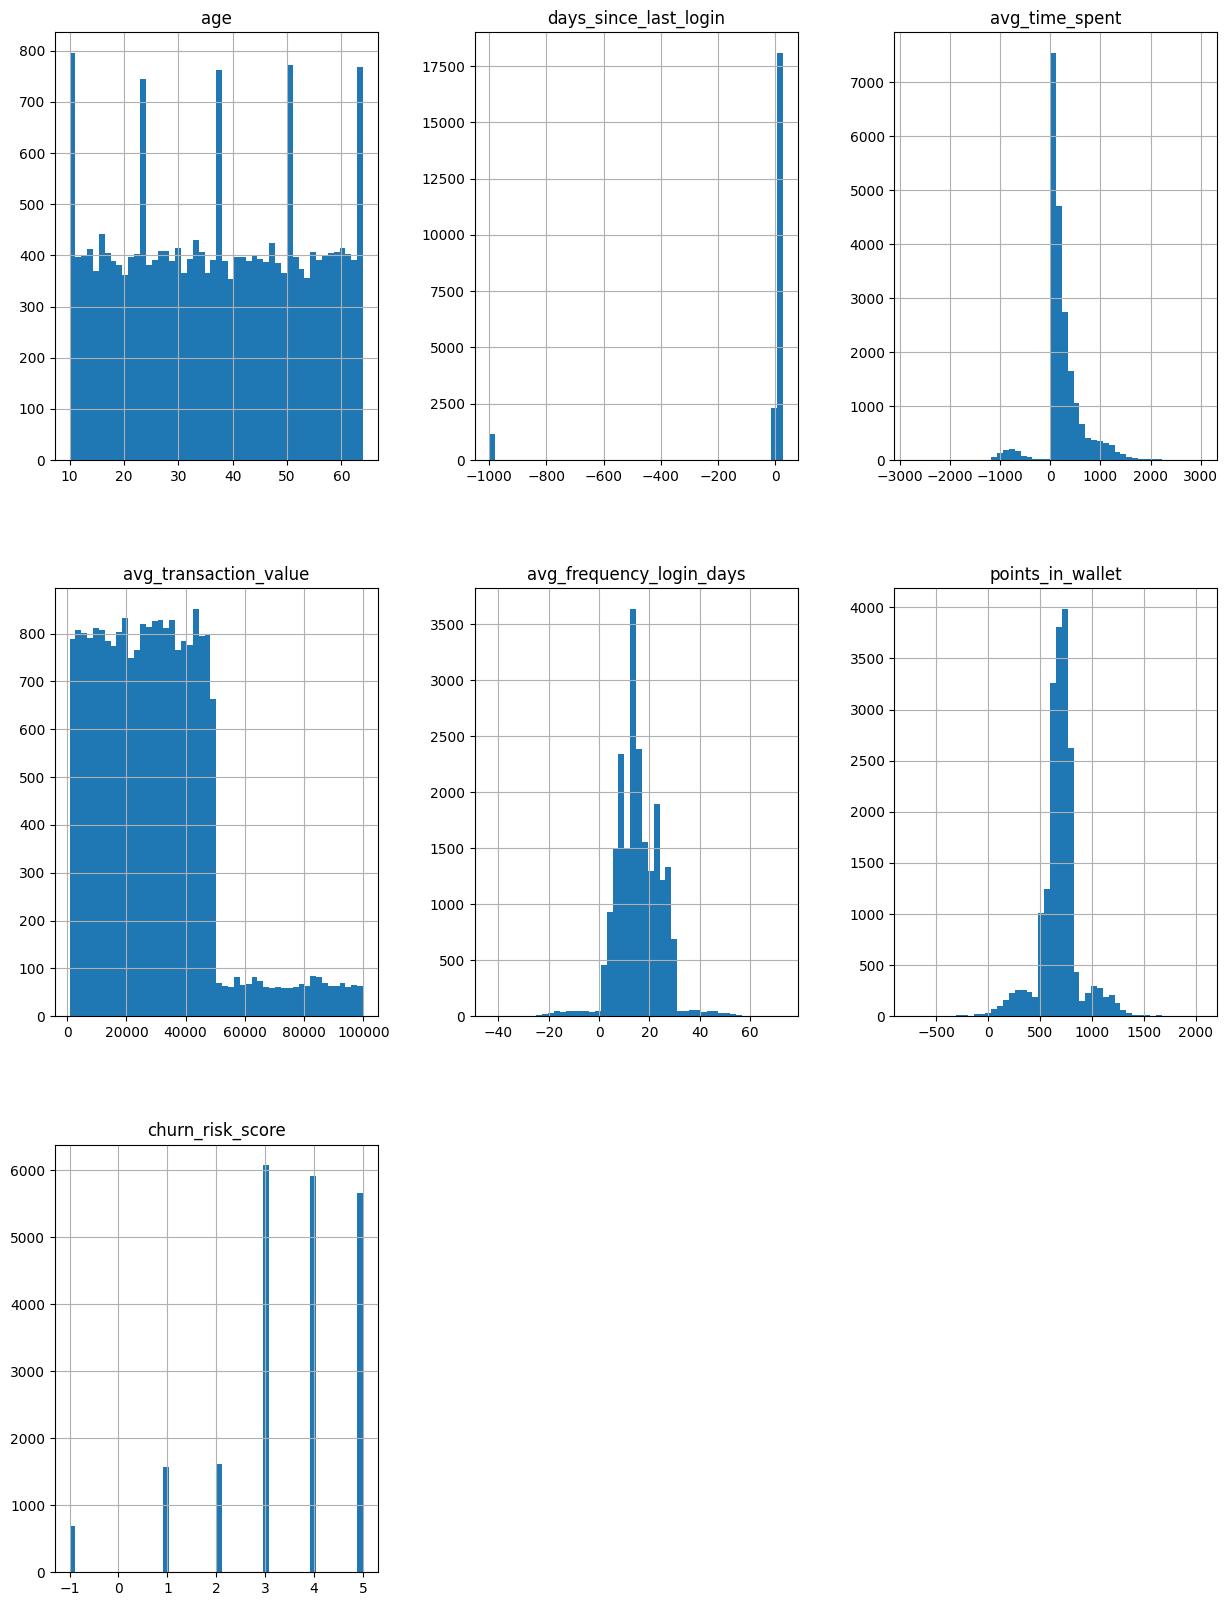

In [314]:
train3.hist(bins=50,figsize=(15,20))

In [315]:
train3["churn_risk_score"]=train3['churn_risk_score'].apply(lambda x:abs(x))
train3["avg_frequency_login_days"]=train3['avg_frequency_login_days'].apply(lambda x:abs(x))
train3["avg_time_spent"]=train3['avg_time_spent'].apply(lambda x:abs(x))
train3["days_since_last_login"]=train3["days_since_last_login"].apply(lambda x: abs(x) )


C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_4828\2142303580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train3["churn_risk_score"]=train3['churn_risk_score'].apply(lambda x:abs(x))
C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_4828\2142303580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train3["avg_frequency_login_days"]=train3['avg_frequency_login_days'].apply(lambda x:abs(x))
C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_4828\2142303580.py:3: SettingWithCopyWarning: 


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'days_since_last_login'}>,
        <Axes: title={'center': 'avg_time_spent'}>],
       [<Axes: title={'center': 'avg_transaction_value'}>,
        <Axes: title={'center': 'avg_frequency_login_days'}>,
        <Axes: title={'center': 'points_in_wallet'}>],
       [<Axes: title={'center': 'churn_risk_score'}>, <Axes: >, <Axes: >]],
      dtype=object)

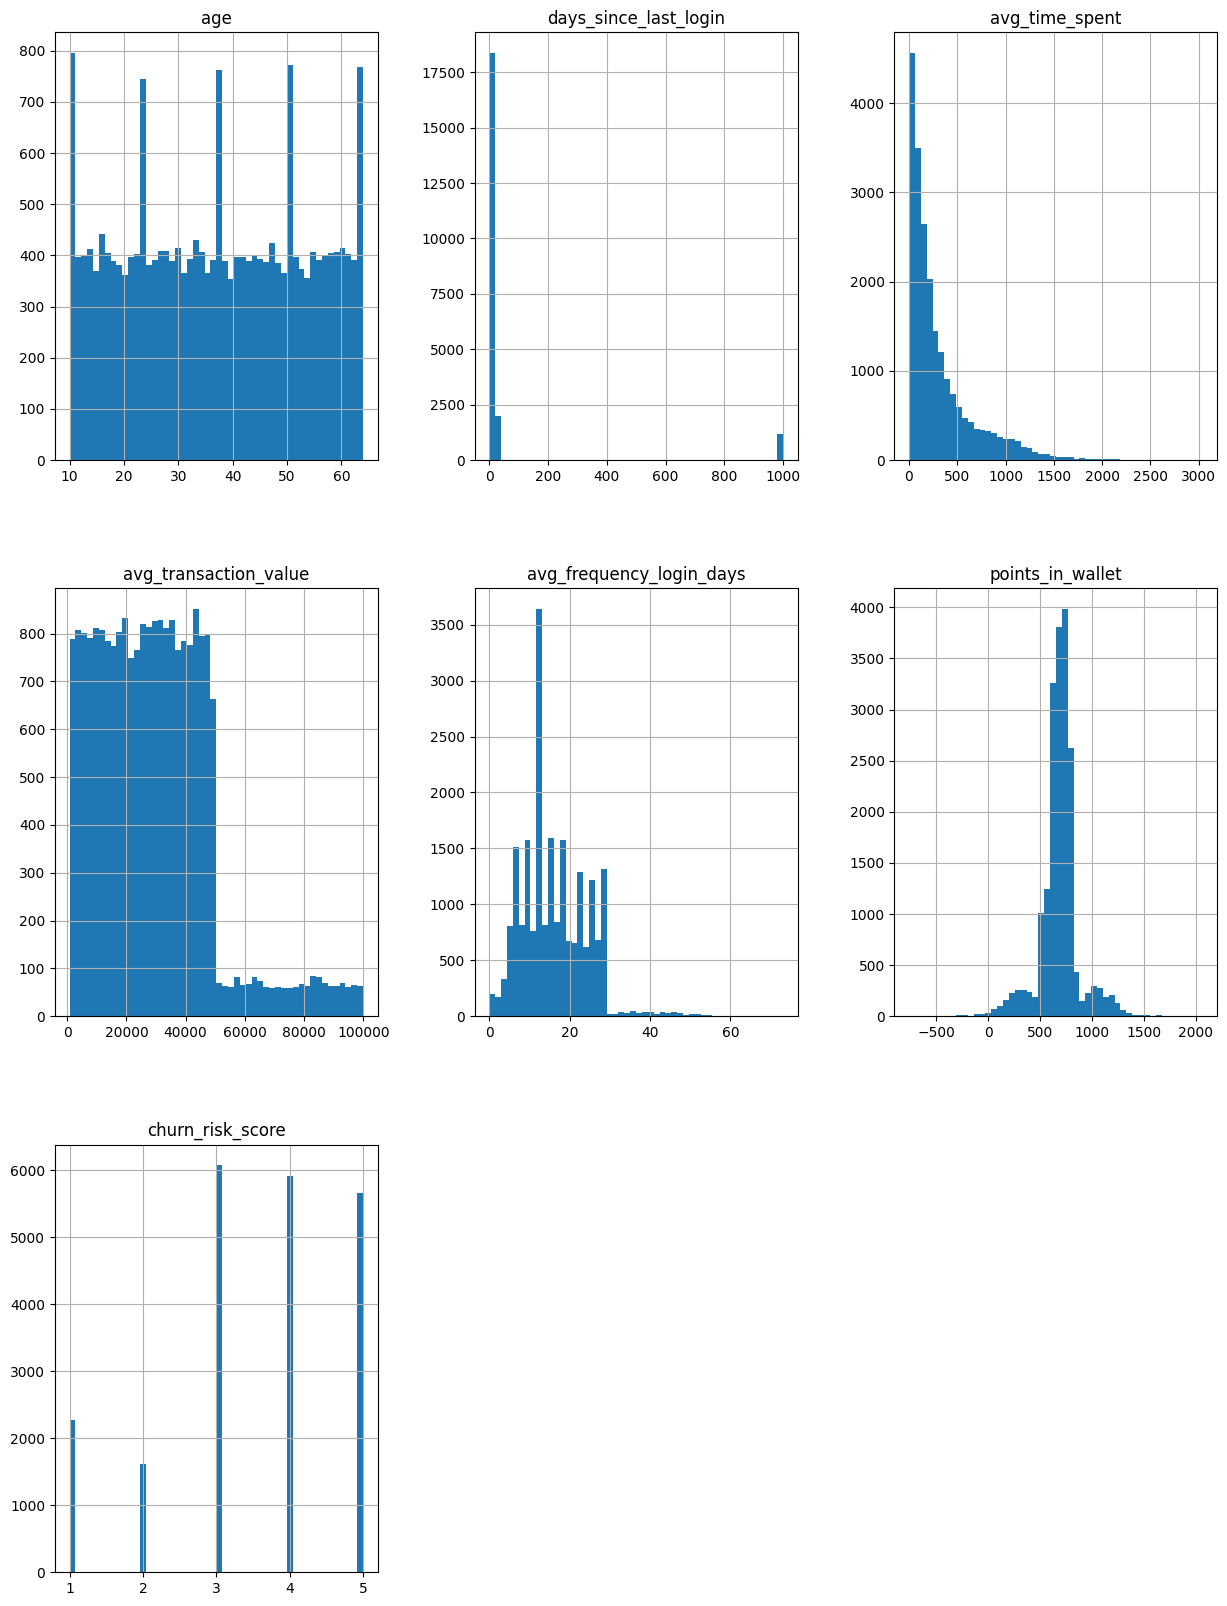

In [316]:
train3.hist(bins=50,figsize=(15,20))


In [317]:
train3.head(10)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1,48,F,Village,Silver Membership,No,Without Offers,Smartphone,Mobile_Data,3,259.620000,12549.93,36.204801,765.970000,Yes,No,No,Not Applicable,Poor Product Quality,3
4,12,M,City,Basic Membership,Yes,Without Offers,Smartphone,Mobile_Data,11,1079.755553,1436.20,13.000000,617.710000,Yes,No,No,Not Applicable,Poor Customer Service,5
5,38,M,Town,No Membership,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,3,47.160000,19773.32,13.000000,126.690772,Yes,No,No,Not Applicable,No reason specified,5
6,59,F,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,23,32.160000,16625.03,7.000000,756.220000,Yes,No,Yes,No Information Available,Reasonable Price,1
7,16,M,City,Silver Membership,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,12,122.780000,3516.71,17.000000,726.650000,Yes,No,No,Not Applicable,Poor Customer Service,3
8,58,M,Town,No Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,206.440000,4191.00,13.000000,716.350000,Yes,No,No,Not Applicable,Poor Website,4
9,47,F,City,Silver Membership,Yes,Gift Vouchers/Coupons,Both,Mobile_Data,21,1072.920000,30336.53,17.000000,762.160000,Yes,Yes,Yes,Solved in Follow-up,Poor Website,3
11,38,M,Town,No Membership,Yes,Without Offers,Both,Mobile_Data,11,400.010000,16758.33,23.000000,656.670000,No,Yes,Yes,No Information Available,Poor Product Quality,4
13,44,F,Village,No Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,999,111.260000,26821.38,16.000000,698.780000,No,Yes,No,Not Applicable,Poor Product Quality,4
14,52,M,Village,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,2,296.240000,39146.44,14.000000,706.950000,Yes,No,No,Not Applicable,Poor Customer Service,3


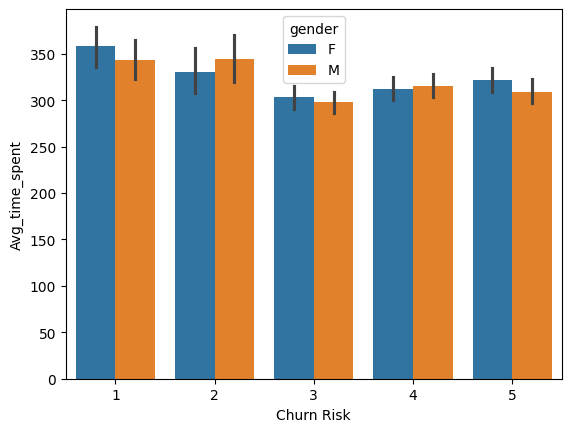

In [318]:
sns.barplot(x='churn_risk_score',y='avg_time_spent',hue='gender',data=train3)
plt.xlabel("Churn Risk")
plt.ylabel("Avg_time_spent")
plt.show()

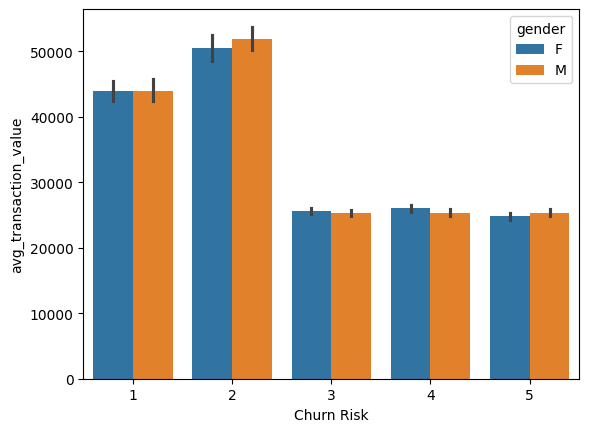

In [319]:
sns.barplot(x='churn_risk_score',y='avg_transaction_value',hue='gender',data=train3)
plt.xlabel("Churn Risk")
plt.ylabel("avg_transaction_value")
plt.show()

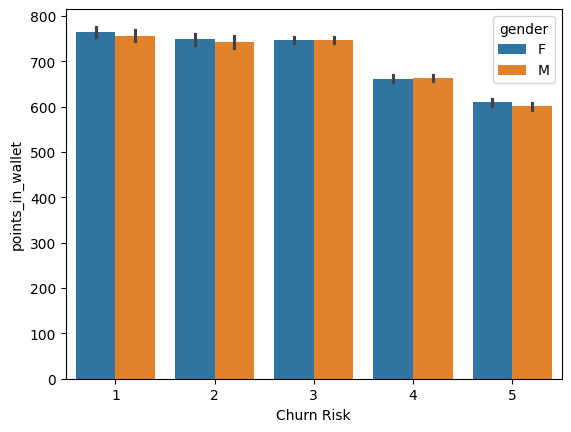

In [320]:
sns.barplot(x='churn_risk_score',y='points_in_wallet',hue='gender',data=train3)
plt.xlabel("Churn Risk")
plt.ylabel("points_in_wallet")
plt.show()

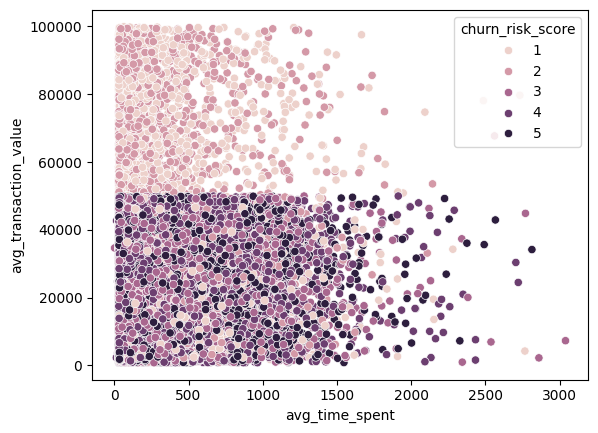

In [321]:
sns.scatterplot(x='avg_time_spent',y='avg_transaction_value',hue='churn_risk_score',data=train3)
plt.xlabel('avg_time_spent')
plt.ylabel('avg_transaction_value')
plt.show()